# Introduction to statistics with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

## The data

National Survey of Family Growth, taken from https://github.com/AllenDowney/ThinkStats2


* `caseid` is the integer ID of the respondent.
* `prglngth` is the integer duration of the pregnancy in weeks.
* `outcome` is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.
* `pregordr` is a pregnancy serial number; for example, the code for a respondent’s first pregnancy is 1, for the second pregnancy is 2, and so on.
* `birthord` is a serial number for live births; the code for a respondent’s first child is 1, and so on. For outcomes other than live birth, this field is blank.
* `birthwgt_lb` and birthwgt_oz contain the pounds and ounces parts of the birth weight of the baby.
* `agepreg` is the mother’s age at the end of the pregnancy.
* `finalwgt` is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.
* `poverty`: poverty level income

More information at https://www.icpsr.umich.edu/icpsradmin/nsfg/search

In [1]:
import pandas as pd

pd.options.display.max_columns = None

df = pd.read_csv('nsfg.csv', index_col=0)
df.head(5)

,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,kidage,hpagelb,birthplc,paybirth1,paybirth2,paybirth3,knewpreg,trimestr,ltrimest,priorsmk,postsmks,npostsmk,getprena,bgnprena,pnctrim,lpnctri,workpreg,workborn,didwork,matweeks,weeksdk,matleave,matchfound,livehere,alivenow,cmkidied,cmkidlft,lastage,wherenow,legagree,parenend,anynurse,fedsolid,frsteatd_n,frsteatd_p,frsteatd,quitnurs,ageqtnur_n,ageqtnur_p,ageqtnur,matchfound2,livehere2,alivenow2,cmkidied2,cmkidlft2,lastage2,wherenow2,legagree2,parenend2,anynurse2,fedsolid2,frsteatd_n2,frsteatd_p2,frsteatd2,quitnurs2,ageqtnur_n2,ageqtnur_p2,ageqtnur2,matchfound3,livehere3,alivenow3,cmkidied3,cmkidlft3,lastage3,wherenow3,legagree3,parenend3,anynurse3,fedsolid3,frsteatd_n3,frsteatd_p3,frsteatd3,quitnurs3,ageqtnur_n3,ageqtnur_p3,ageqtnur3,cmlastlb,cmfstprg,cmlstprg,cmintstr,cmintfin,cmintstrop,cmintfinop,cmintstrcr,cmintfincr,evuseint,stopduse,whystopd,whatmeth01,whatmeth02,whatmeth03,whatmeth04,resnouse,wantbold,probbabe,cnfrmno,wantbld2,timingok,toosoon_n,toosoon_p,wthpart1,wthpart2,feelinpg,hpwnold,timokhp,cohpbeg,cohpend,tellfath,whentell,tryscale,wantscal,whyprg1,whyprg2,whynouse1,whynouse2,whynouse3,anyusint,prglngth,outcome,birthord,datend,agepreg,datecon,agecon,fmarout5,pmarpreg,rmarout6,fmarcon5,learnprg,pncarewk,paydeliv,lbw1,bfeedwks,maternlv,oldwantr,oldwantp,wantresp,wantpart,cmbirth,ager,agescrn,fmarital,rmarital,educat,hieduc,race,hispanic,hisprace,rcurpreg,pregnum,parity,insuranc,pubassis,poverty,laborfor,religion,metro,brnout,yrstrus,prglngth_i,outcome_i,birthord_i,datend_i,agepreg_i,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
caseid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1093.0,NaN,1084.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,138.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,1093.0,1166.0,920.0,1093.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,1,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,39,1,1.0,1093.0,33.16,1084,3241,1.0,2.0,1.0,1,NaN,NaN,NaN,2.0,995.0,NaN,1,2,1,2,695,44,44,1,1,16,12,2,2,2,2,2,2,2,2,469,3,2,1,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1166.0,NaN,1157.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,65.0,42.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,0.0,5.0,NaN,1.0,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,1.0,4.0,NaN,20.0,1.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,1093.0,1166.0,1093.0,1166.0,1166.0,1231.0,NaN,

In [2]:
type(df)

pandas.core.frame.DataFrame

## `matplotlib`

We are only going to use the most basic functions of matplotlib

In [6]:
import matplotlib.pyplot as plt


### Histogram

<AxesSubplot:>

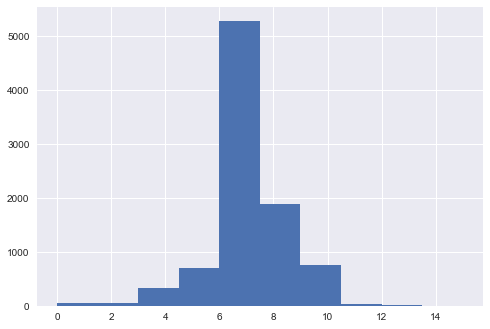

In [10]:
plt.style.use('seaborn')

df['birthwgt_lb'].hist()

<AxesSubplot:>

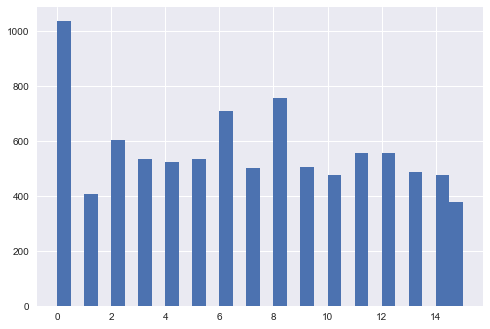

In [24]:
df['birthwgt_oz'].hist(bins=30)



<AxesSubplot:>

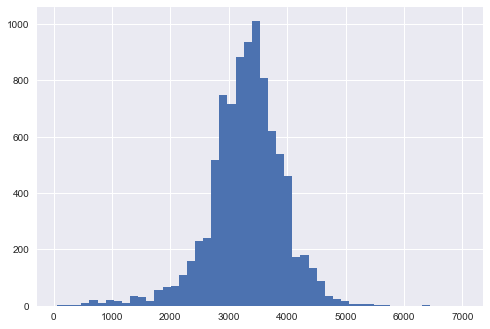

In [30]:
df['birthwgt_g'] = df['birthwgt_lb'] * 454 + df['birthwgt_oz'] * 28.35
df['birthwgt_g'].hist(bins=50)

### Bar plot

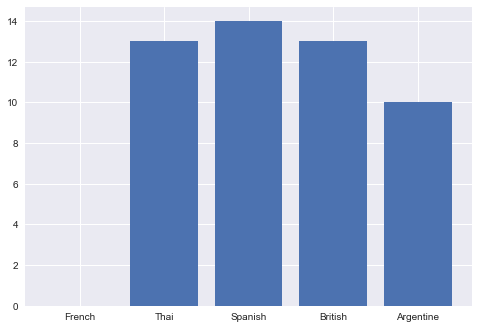

In [14]:
import numpy as np

n = 5

plt.bar(range(n), np.random.randint(20, size=n))
plt.xticks(range(n), ['French', 'Thai', 'Spanish', 'British', 'Argentine']);



### Scatter plot

In [32]:
df['birthord']

caseid
1        1.0
1        2.0
2        1.0
2        2.0
2        3.0
        ... 
12571    1.0
12571    NaN
12571    NaN
12571    2.0
12571    3.0
Name: birthord, Length: 13593, dtype: float64

In [31]:
df['birthwgt_g']

caseid
1        4000.55
1        3574.90
2        4142.70
2        3178.00
2        2809.05
          ...   
12571    2809.05
12571        NaN
12571        NaN
12571    3404.80
12571    3404.80
Name: birthwgt_g, Length: 13593, dtype: float64

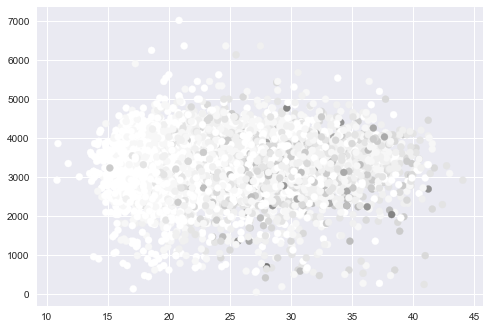

In [38]:
plt.scatter(df['agepreg'], df['birthwgt_g'], c=df['pregordr'])

## Descriptive statistics

### Measures of centrality

#### Average

$$\bar{x} = \frac{\sum_{i=1}^{n}x_1}{n}$$

#### Median

50th percentile

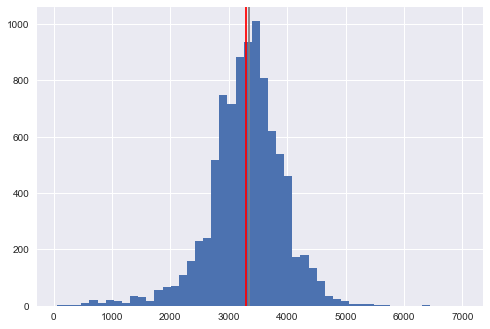

In [44]:
plt.hist(df['birthwgt_g'], bins=50);
plt.axvline(df['birthwgt_g'].mean(), c='red')
plt.axvline(df['birthwgt_g'].median(), c='grey')

### Measures of dispersion

#### Variance and standard deviation

$$v_x = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$$

$$\sigma_x = \sqrt{v_x}$$

In [45]:
mean = df['birthwgt_g'].mean()
mean

3298.4223722062566

In [51]:
var = ((df['birthwgt_g'] - mean) ** 2).sum() / len(df['birthwgt_g'])
var

271764.2534956478

In [53]:
std = var ** .5

std

521.3101317792009

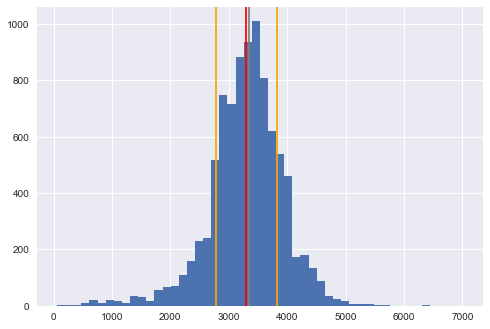

In [69]:
plt.hist(df['birthwgt_g'], bins=50);
plt.axvline(df['birthwgt_g'].mean(), c='red')
plt.axvline(df['birthwgt_g'].mean() - std, c='orange')
plt.axvline(df['birthwgt_g'].mean() + std, c='orange')

plt.axvline(df['birthwgt_g'].median(), c='grey');

### z-score

$$z_i = \frac{x_i - \mu}{\sigma}$$

#### Exercise

Calculate the z-scores of every `birthweight_g` and plot them like we have just done.

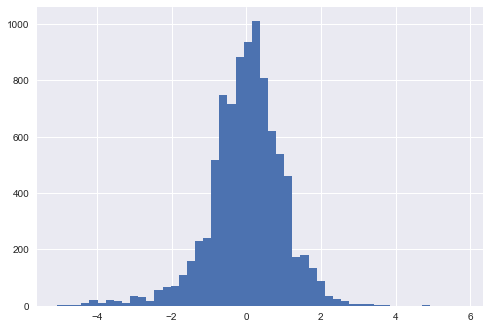

In [73]:
zscores = (df['birthwgt_g'] - df['birthwgt_g'].mean()) / df['birthwgt_g'].std()

plt.hist(zscores, bins=50);

## Correlation and covariance

Let's make up some data to play around:

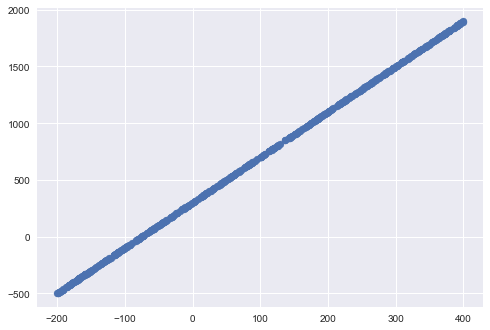

In [79]:
n = 500

xs = np.random.uniform(-200, 400, size=n)
ys = xs * 4 + 300

plt.scatter(xs, ys)

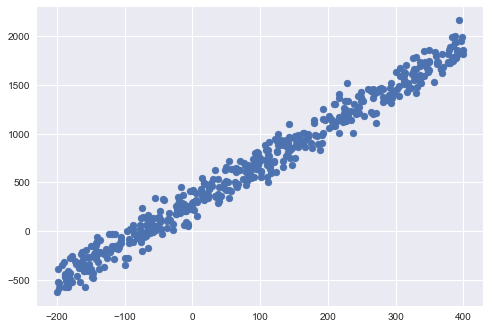

In [82]:
xs = np.random.uniform(-200, 400, size=n)
ys = xs * 4 + 300 + np.random.randn(xs.size) * 100

plt.scatter(xs, ys)

#### Exercise

Make three series ys1, ys2, ys3 that have a linear, quadratic and cubic relationship to xs.

The coefficients should be:

```python
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2
```

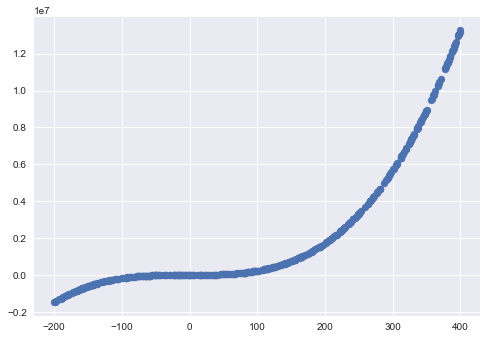

In [106]:
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2

ys1 = x_0 + x_1 * xs
ys2 = x_0 + x_1 * xs + x_2 * xs ** 2
ys3 = x_0 + x_1 * xs + x_2 * xs ** 2 + x_3 * xs ** 3

plt.scatter(xs, ys3)

Let's plot them

### Covariance

$$cov_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n}$$


A measure of how much two variables change together. It is a dot product, so the covariance is
maximized if the two vectors are identical, 0 if they are orthogonal, and negative if they point in opposite directions.

### Correlation and dependence

#### Pearson correlation coefficient


$$ r = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^2}} $$


Pretty ugly, huh? But fear not! Remember:


$$v_x = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$$

$$\sigma_x = \sqrt{v_x}$$

![Pearson correlations](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

#### Spearman correlation coefficient

## Probability

Let's play with a coin

Now with numpy

#### Exercise

The p-value is a widely used (and criticized) measure of how surprising an observation is under a given set of assumptions.

It is defined as "the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct" [1](https://en.wikipedia.org/wiki/P-value).

Let's play with a lot of coins. Calculate experimentally the p-value of getting 120 or more heads when tossing 1000 heavily weighted coinds, each with a $p_{heads}=0.1$.


Otra manera:

### Intersection

### Union

Let's play with loaded coins

### Conditioned Probability


$$P(A\mid B) = \frac{P(A\cap B)}{P(B)}$$


### Independent events

Definition:

$$P(A\mid B) = P(A)$$

Properties:

$$P(A \cap B) = P(A) \cdot P(B)$$

$$P(A \mid B) = P(A)$$

$$P(B \mid A) = P(B)$$

### Law of total probability

$$P(S) = \sum_{i=1}^n P(S \mid S_i)P(S_i)$$

### Bayes theorem

$$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$$

## Random variable


https://docs.scipy.org/doc/scipy/reference/stats.html

## Discrete and continuous variables

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete

### Discrete variables



### Binomial Distribution

### Generating random observations

#### pmf

Probability Mass Function

In the data:

#### Exercise

What is the probability of getting 3 or fewer heads when tossing 8 times a fair coin?

#### cdf

Cumulative Distribution Function

### Poisson

### Continuous distributions



What is the probabilty of `uniform` being exactly 10?

#### pdf


Probability Density Function

#### Exercise

What is the probability of `uniform` taking a value between 10 and 15?

### Normal

#### Exercise

Approximate the shaded area below the curve using `normal.pdf(xs)`. Do it also using the cumulative distribution function and compare.

#### Checking normality

### The central limit theorem

## Hypothesis testing




The other day I was playing settlers of Catan with some friends. I got 6 sevens out of 20 tosses.

I naturally tossed my drink in my host's face and stormed out. But now I'm not so sure. How could I approach this in a scientific way?

Given a sample and an apparent effect, what is the probability of seeing that big an effect by chance?

1) Quantify the size of the apparent effect by choosing a test statistic.

2) Define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real.

3) Compute a p-value, which is the probability of seeing the apparent effect if the null hypothesis is true.

4) Interpret the result. If the p-value is low, the effect is said to be statistically significant, which means that it is unlikely to have occurred by chance.

### The null hypothesis and the alternate hypothesis

We assume the null hypothesis and try to disprove it.

### Testing difference between means

In the NSFG data, the mean pregnancy length for first
babies is slightly longer, and the mean birth weight is slightly smaller. Is this effect significant?

### p-fishing

Careful with repeated testing!

![Don't be this guy](https://imgs.xkcd.com/comics/significant.png)

https://xkcd.com/882/

### The contingency table

Also called cross-tabulation

If both variables were independent, how many examples would you expect in each square?

### Independence testing

For testing whether two events are independent, we use Pearson's chi-squared test.

## Statistical modelling: the two cultures

# Further reading

[Think Stats](https://greenteapress.com/wp/think-stats-2e/)

[Correlation and dependence](https://en.wikipedia.org/wiki/Correlation_and_dependence)

[National Survey of Family Growth](https://www.cdc.gov/nchs/nsfg/index.htm?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fnchs%2Fnsfg.htm)

[xkcd: Significant](https://xkcd.com/882/)

[Statistical modelling: the two cultures](https://projecteuclid.org/euclid.ss/1009213726)

https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance

